# Otimização de Portfólios

Nesse pequeno projeto usarei uma biblioteca chamada *PyPortfolioOpt* que pode ser usada para otimização de portfólios (conjuntos de ativos financeiros usados para investimentos que forma uma carteira). Em um projeto anterior usei apenas a bibliotecas padrão para análise de dados (*pandas* e *numpy*) o que gerou um certo trabalho na hora de codificar. Essa biblioteca permite obter análises e resultados de forma mais automatizada gerando uma quantidade menor de código.

Vale a pena repetir aqui: A otimização de portfólio é o processo onde técnicas matemáticas e estatísticas são usadas para identificar e gerar uma carteira ou portfólio ótimo de ativos para investimentos, com a finalidade de aumentar o retorno do investimento maior e com um risco menor, minimizando o risco de insucessos em investimentos.

Para esse trabalho usarei os mesmo dados do projeto anterior. Vou extrair do site *Yahoo! Finance* os dados das 11 empresas brasileiras abaixo:

1) Setor bancário : Banco Bradesco (*BBDC4.SA*) e Itaú Unibanco (*ITSA4.SA*);

2) Setor elétrico : EDP - Energias do Brasil (*ENBR3.SA*) e Cemig (*CMIG4.SA*)

3) Gás e Petróleo : Petrobras (*PETR4.SA*);

4) Telecomunicações : Oi (*OIBR4.SA*) e Telefônica (*VIVT4.SA*);

5) Alimentos : JBS (*JBSS3.SA*);

6) Químico : Braskem (*BRKM5.SA*)

7) Siderurgia :Usiminas (*USIM5.SA*);

8) Comércio : Lojas Americanas (*LAME4.SA*).

## Instalando a biblioteca *PyPortfolioOpt*

In [1]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 2.8MB/s 


## Importando as bibliotecas

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data as wb
from pypfopt import efficient_frontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt import cla
from pypfopt import hierarchical_portfolio


## Importando os dados

Usarei um *loop for* para extrair os dados de fechamento ajustado das ações.

In [3]:
tickers=['BBDC4.SA','PETR4.SA','ITSA4.SA','OIBR4.SA','VIVT4.SA','BRKM5.SA','CMIG4.SA','JBSS3.SA','USIM5.SA',
         'LAME4.SA','ENBR3.SA']
newdata=pd.DataFrame()
for t in tickers:
    newdata[t]=wb.DataReader(t,data_source='yahoo',start='2019-1-1',end='2019-12-31')['Adj Close']

Visualizando os dados

In [4]:
newdata.head()

,BBDC4.SA,PETR4.SA,ITSA4.SA,OIBR4.SA,VIVT4.SA,BRKM5.SA,CMIG4.SA,JBSS3.SA,USIM5.SA,LAME4.SA,ENBR3.SA
Date,,,,,,,,,,,
2019-01-02,31.118940,23.284786,11.501853,1.30,40.703033,43.746208,12.662499,11.766559,9.508233,19.293280,13.713815
2019-01-03,31.432852,23.855778,11.601870,1.47,41.065376,44.008808,12.396806,11.952243,9.303650,19.234570,14.284417
2019-01-04,31.186260,23.923521,11.565503,1.45,40.979103,43.519821,12.272809,12.264977,9.849203,18.990026,14.390800
2019-01-07,31.556227,24.300957,11.556408,1.43,41.324192,43.211941,11.909762,11.834969,9.868688,19.623545,13.974936
2019-01-08,31.748905,24.155787,11.710979,1.40,41.419083,43.184772,11.847810,12.020654,9.592963,19.653009,14.023293


In [5]:
newdata.tail()

,BBDC4.SA,PETR4.SA,ITSA4.SA,OIBR4.SA,VIVT4.SA,BRKM5.SA,CMIG4.SA,JBSS3.SA,USIM5.SA,LAME4.SA,ENBR3.SA
Date,,,,,,,,,,,
2019-12-20,35.308628,29.844723,13.475850,1.23,53.012104,28.379999,12.475524,25.412397,9.243930,26.125483,20.742186
2019-12-23,35.526276,30.081429,13.573150,1.23,53.488541,29.250000,12.521295,25.725164,9.442085,26.385338,20.878073
2019-12-26,35.971466,30.485802,13.806667,1.24,53.955807,30.170000,12.767806,25.891323,9.442085,26.635201,21.140141
2019-12-27,35.832962,30.517742,13.748287,1.24,53.580154,30.440001,12.767806,25.803356,9.343008,26.075512,21.091608
2019-12-30,35.783489,30.177769,13.709369,1.23,53.122051,29.850000,12.861021,25.216917,9.422270,25.895611,21.450739


Informações sobre a base de dados

In [6]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2019-01-02 to 2019-12-30
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BBDC4.SA  247 non-null    float64
 1   PETR4.SA  247 non-null    float64
 2   ITSA4.SA  247 non-null    float64
 3   OIBR4.SA  247 non-null    float64
 4   VIVT4.SA  247 non-null    float64
 5   BRKM5.SA  247 non-null    float64
 6   CMIG4.SA  247 non-null    float64
 7   JBSS3.SA  247 non-null    float64
 8   USIM5.SA  247 non-null    float64
 9   LAME4.SA  247 non-null    float64
 10  ENBR3.SA  247 non-null    float64
dtypes: float64(11)
memory usage: 23.2 KB


Não há valores ausentes na base de dados.

In [7]:
newdata.isna().sum()

BBDC4.SA    0
PETR4.SA    0
ITSA4.SA    0
OIBR4.SA    0
VIVT4.SA    0
BRKM5.SA    0
CMIG4.SA    0
JBSS3.SA    0
USIM5.SA    0
LAME4.SA    0
ENBR3.SA    0
dtype: int64

Tabela Estatística dos dados.

In [8]:
newdata.describe()

,BBDC4.SA,PETR4.SA,ITSA4.SA,OIBR4.SA,VIVT4.SA,BRKM5.SA,CMIG4.SA,JBSS3.SA,USIM5.SA,LAME4.SA,ENBR3.SA
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,33.038702,26.557699,12.103004,1.515101,45.801686,36.664876,12.692149,22.097006,8.626404,18.451444,18.017645
std,1.595598,1.724097,0.786674,0.167570,3.993627,7.929784,0.604960,5.911343,0.861708,2.721246,1.406557
min,29.493618,23.284786,10.439577,1.120000,39.823067,25.404394,11.415400,11.766559,6.935424,14.319851,13.713815
25%,31.930003,25.310676,11.570132,1.380000,41.712412,29.213224,12.268384,15.709918,7.950969,16.185987,17.018188
50%,32.941067,26.422464,12.050067,1.530000,46.387882,34.138367,12.694952,22.959124,8.608921,18.700306,18.383575
75%,34.263706,27.386546,12.687346,1.650000,49.196077,44.085777,13.168512,27.279230,9.367777,19.883820,18.893151
max,36.717976,30.544981,13.806667,1.880000,53.955807,50.736904,14.074989,32.449677,10.722125,26.725149,21.450739


Correlação entre as séries de preços de fechamento.

In [9]:
newdata.corr()

,BBDC4.SA,PETR4.SA,ITSA4.SA,OIBR4.SA,VIVT4.SA,BRKM5.SA,CMIG4.SA,JBSS3.SA,USIM5.SA,LAME4.SA,ENBR3.SA
BBDC4.SA,1.000000,0.364745,0.279825,0.197411,-0.046404,0.285036,0.145464,-0.298572,0.503434,0.124662,0.139308
PETR4.SA,0.364745,1.000000,0.676409,-0.276061,0.569282,-0.341827,-0.259443,0.340294,-0.029400,0.495270,0.453714
ITSA4.SA,0.279825,0.676409,1.000000,-0.526458,0.782910,-0.566993,-0.148451,0.524577,-0.197063,0.760389,0.533001
OIBR4.SA,0.197411,-0.276061,-0.526458,1.000000,-0.428228,0.428776,0.503884,-0.288833,0.296243,-0.652706,-0.123042
VIVT4.SA,-0.046404,0.569282,0.782910,-0.428228,1.000000,-0.887943,0.103703,0.864954,-0.525433,0.514969,0.785268
BRKM5.SA,0.285036,-0.341827,-0.566993,0.428776,-0.887943,1.000000,-0.173622,-0.911930,0.736793,-0.278138,-0.675261
CMIG4.SA,0.145464,-0.259443,-0.148451,0.503884,0.103703,-0.173622,1.000000,0.225393,-0.102702,-0.408541,0.343031
JBSS3.SA,-0.298572,0.340294,0.524577,-0.288833,0.864954,-0.911930,0.225393,1.000000,-0.808263,0.178533,0.739645
USIM5.SA,0.503434,-0.029400,-0.197063,0.296243,-0.525433,0.736793,-0.102702,-0.808263,1.000000,0.107573,-0.441715
LAME4.SA,0.124662,0.495270,0.760389,-0.652706,0.514969,-0.278138,-0.408541,0.178533,0.107573,1.000000,0.271350


Visualizando as séries de preços

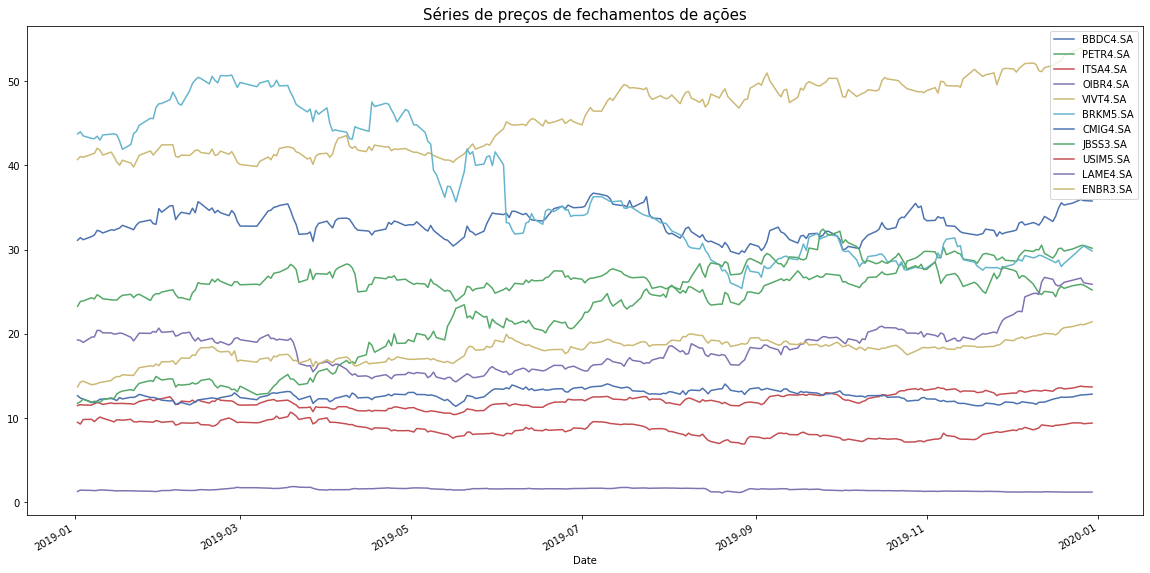

In [10]:
newdata.plot(figsize=(20,10))
plt.title("Séries de preços de fechamentos de ações",size=15);

Não farei mais nenhuma análise, pois já foram feitas no outro projeto, portanto irei agora aplicar diretamente a biblioteca *PyPortfolioOpt*.

Aqui irei ater-me a alguns módulos da biblioteca que são:

1) *Expected Returns*: Gera os retornos esperados de ativos para a otimização de média-variância. Por padrão é gerado o retorno esperado anualizado, entretanto é possível alterar o período de tempo;

2) *Risk Models* : Além da média-variância é necessário o modelo de risco e o modelo de risco mais usado é a matrix de variância que mede a volatilidade dos retornos dos ativos e entre outros ativos. Essa parte é importante, pois é necessário identificar um portfólio que possua o menor risco possível;

3)*Efficient Frontier Optimisation*: Aqui nesse módulo é gerada a carteira ótima.

## *Expected Returns*

Irei gerar os retornos anualizados de cada uma das ações da nossa base de dados com os preços dos ativos. Aqui, por padrão, é usada a média aritmética.

Vemos que as ações que mais deram retorno no ano de 2019 foram a *JBSS3.SA* (118.331%), *ENBR3.SA* (58.13%) e *LAME4.SA* (35.18%). Um investidor que colocasse seu dinheiro no começo do ano de 2019 na JBS teria, ao fim do ano, mais do que dobrado seu investimento. 

Entretanto essa não é a única forma de analisar essas ações.

In [11]:
expected_returns.mean_historical_return(newdata, returns_data=False, compounding=True, frequency=252)*100

BBDC4.SA     15.381810
PETR4.SA     30.425219
ITSA4.SA     19.704201
OIBR4.SA     -5.512255
VIVT4.SA     31.361695
BRKM5.SA    -32.398670
CMIG4.SA      1.606336
JBSS3.SA    118.331669
USIM5.SA     -0.926041
LAME4.SA     35.187851
ENBR3.SA     58.133037
dtype: float64

Outra forma é a **média móvel exponencial ponderada dos retornos** que dá mais peso para os valores mais recentes dos preços, pois no caso anterior, como é feita uma média aritmética, os pesos são iguais. Aqui os retornos recentes possuem mais crédito e aumenta a relevância das expectativas. Não modificarei as entradas dos parâmetros.

Já percebe-se uma diferença em relação ao resultado anterior, pois o retorno da *LAME4.SA* foi maior que o da *ENBRE3.SA*. A ações da JBS ainda são as que mais deram retorno, dentre as ações do portfólio.

In [12]:
expected_returns.ema_historical_return(newdata, returns_data=False, compounding=True, span=500, frequency=252)

BBDC4.SA    0.221748
PETR4.SA    0.368557
ITSA4.SA    0.278947
OIBR4.SA   -0.100532
VIVT4.SA    0.360153
BRKM5.SA   -0.248840
CMIG4.SA    0.061660
JBSS3.SA    0.921585
USIM5.SA    0.186975
LAME4.SA    0.763603
ENBR3.SA    0.586290
Name: 2019-12-30 00:00:00, dtype: float64

No outro projeto demorei um pouco até chegar no modelo *CAPM* (*Capital Asset Pricing Model*), que também é uma forma de estimar os retornos, e aqui já posso gerar os resultado com uma linha de comando. Esse método é basicamente a função abaixo

$R_i=R_f+\beta_i(E(R_m)−R_f)$

Onde $R_i$ é o retorno esperado, $R_f$ é a taxa do ativo livre de risco, $\beta_i$ é a covariância do ativo com a sua carteira dividido pela sua volatilidade (variância) e $R_m$ é o retorno de mercado. Por padrão usa-se a taxa livre de risco com valor 0.02 (2%), que é a taxa de juros de títulos americanos.

Veja que pelo método *CAPM* a ação de maior retorno é a *USIM5.SA*, seguida de *LAME4.SA* e *OIBR4.SA*.

In [13]:
expected_returns.capm_return(newdata, market_prices=None, returns_data=False, risk_free_rate=0.02, compounding=True,frequency=252)

BBDC4.SA    0.250838
PETR4.SA    0.263314
ITSA4.SA    0.216593
OIBR4.SA    0.273068
VIVT4.SA    0.142906
BRKM5.SA    0.250447
CMIG4.SA    0.243645
JBSS3.SA    0.241937
USIM5.SA    0.307283
LAME4.SA    0.277600
ENBR3.SA    0.210117
Name: mkt, dtype: float64

No Brasil a taxa livre de risco pode ser definida como a Taxa Selic (que em 27 de Novembro de 2020) está em 5% (0.05). Com a nova taxa encontramos o resultado anterior, da ações de maior retorno.

In [14]:
expected_returns.capm_return(newdata, market_prices=None, returns_data=False, risk_free_rate=0.05, compounding=True,frequency=252)

BBDC4.SA    0.249844
PETR4.SA    0.260644
ITSA4.SA    0.220197
OIBR4.SA    0.269089
VIVT4.SA    0.156404
BRKM5.SA    0.249505
CMIG4.SA    0.243616
JBSS3.SA    0.242138
USIM5.SA    0.298710
LAME4.SA    0.273012
ENBR3.SA    0.214590
Name: mkt, dtype: float64

Pode-se calculaer os retornos diários por média aritmética ou por meio de logaritmo. Abaixo usei ambas as formas.

Retorno aritmético.

In [15]:
expected_returns.returns_from_prices(newdata, log_returns=False).head()

,BBDC4.SA,PETR4.SA,ITSA4.SA,OIBR4.SA,VIVT4.SA,BRKM5.SA,CMIG4.SA,JBSS3.SA,USIM5.SA,LAME4.SA,ENBR3.SA
Date,,,,,,,,,,,
2019-01-03,0.010087,0.024522,0.008696,0.130769,0.008902,0.006003,-0.020983,0.015781,-0.021516,-0.003043,0.041608
2019-01-04,-0.007845,0.002840,-0.003135,-0.013605,-0.002101,-0.011111,-0.010002,0.026165,0.058639,-0.012714,0.007448
2019-01-07,0.011863,0.015777,-0.000786,-0.013793,0.008421,-0.007074,-0.029581,-0.035060,0.001978,0.033361,-0.028898
2019-01-08,0.006106,-0.005974,0.013375,-0.020979,0.002296,-0.000629,-0.005202,0.015690,-0.027939,0.001501,0.003460
2019-01-09,0.017238,0.020833,0.013199,0.021429,0.015206,0.006710,0.015695,-0.008130,0.032753,0.039480,0.006207


Retorno Logarítmico.

In [16]:
expected_returns.returns_from_prices(newdata, log_returns=True).head()

,BBDC4.SA,PETR4.SA,ITSA4.SA,OIBR4.SA,VIVT4.SA,BRKM5.SA,CMIG4.SA,JBSS3.SA,USIM5.SA,LAME4.SA,ENBR3.SA
Date,,,,,,,,,,,
2019-01-03,0.010037,0.024226,0.008658,0.122898,0.008863,0.005985,-0.021206,0.015657,-0.021751,-0.003048,0.040766
2019-01-04,-0.007876,0.002836,-0.003139,-0.013699,-0.002103,-0.011173,-0.010053,0.025829,0.056984,-0.012795,0.007420
2019-01-07,0.011793,0.015654,-0.000787,-0.013889,0.008386,-0.007100,-0.030028,-0.035689,0.001976,0.032816,-0.029324
2019-01-08,0.006087,-0.005992,0.013287,-0.021202,0.002294,-0.000629,-0.005215,0.015568,-0.028337,0.001500,0.003454
2019-01-09,0.017091,0.020619,0.013112,0.021202,0.015091,0.006688,0.015573,-0.008163,0.032228,0.038721,0.006188


In [17]:
expected_returns.log_returns_from_prices(newdata).head()

/usr/local/lib/python3.6/dist-packages/pypfopt/expected_returns.py:57: UserWarning: log_returns_from_prices is deprecated. Please use returns_from_prices(prices, log_returns=True)
  "log_returns_from_prices is deprecated. Please use returns_from_prices(prices, log_returns=True)"


,BBDC4.SA,PETR4.SA,ITSA4.SA,OIBR4.SA,VIVT4.SA,BRKM5.SA,CMIG4.SA,JBSS3.SA,USIM5.SA,LAME4.SA,ENBR3.SA
Date,,,,,,,,,,,
2019-01-03,0.010037,0.024226,0.008658,0.122898,0.008863,0.005985,-0.021206,0.015657,-0.021751,-0.003048,0.040766
2019-01-04,-0.007876,0.002836,-0.003139,-0.013699,-0.002103,-0.011173,-0.010053,0.025829,0.056984,-0.012795,0.007420
2019-01-07,0.011793,0.015654,-0.000787,-0.013889,0.008386,-0.007100,-0.030028,-0.035689,0.001976,0.032816,-0.029324
2019-01-08,0.006087,-0.005992,0.013287,-0.021202,0.002294,-0.000629,-0.005215,0.015568,-0.028337,0.001500,0.003454
2019-01-09,0.017091,0.020619,0.013112,0.021202,0.015091,0.006688,0.015573,-0.008163,0.032228,0.038721,0.006188


Por fim posso calcular os pseudo-preços diários dados aos retornos, que são os preços normalizados. A vantagem é que podemos comparar os preços em uma mesma escala.

In [18]:
expected_returns.prices_from_returns(expected_returns.returns_from_prices(newdata, log_returns=True))

,BBDC4.SA,PETR4.SA,ITSA4.SA,OIBR4.SA,VIVT4.SA,BRKM5.SA,CMIG4.SA,JBSS3.SA,USIM5.SA,LAME4.SA,ENBR3.SA
Date,,,,,,,,,,,
2019-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-04,0.992124,1.002836,0.996861,0.986301,0.997897,0.988827,0.989947,1.025829,1.056984,0.987205,1.007420
2019-01-07,1.003824,1.018534,0.996076,0.972602,1.006265,0.981806,0.960221,0.989218,1.059073,1.019601,0.977879
2019-01-08,1.009935,1.012431,1.009311,0.951981,1.008573,0.981189,0.955214,1.004618,1.029062,1.021131,0.981256
2019-01-09,1.027196,1.033307,1.022545,0.972165,1.023794,0.987751,0.970089,0.996417,1.062227,1.060670,0.987328
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,1.086864,1.202870,1.130664,0.750088,1.269456,0.597022,0.970388,1.933892,0.932459,1.284322,1.405522
2019-12-23,1.093543,1.212372,1.138798,0.750088,1.280814,0.615049,0.973941,1.957548,0.952237,1.297033,1.414700
2019-12-26,1.107162,1.228561,1.158224,0.756162,1.291954,0.634096,0.992929,1.970151,0.952237,1.309258,1.432347


Plotando os pseudo-preços/preços normalizados.

Podemos ver que a série com maior crescimento foi a *PETR4.SA*.

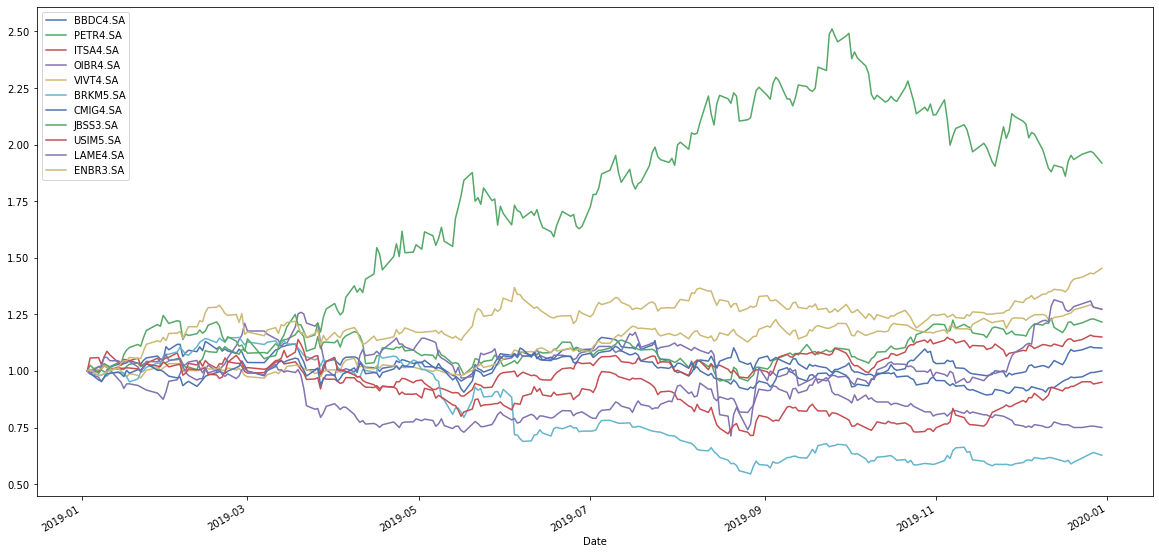

In [94]:
expected_returns.prices_from_returns(expected_returns.returns_from_prices(newdata, log_returns=True)).plot(figsize=(20,10));

## *Risk Models*

Agora usarei a biblioteca para analisar o risco do meu portfólio e a Biblioteca *PyPortfolioOpt* permite gerar vário modelos de risco.  A primeira é a matriz de covariância, que é a mais conhecida, mas há alternativas que são oferecidas como a matriz de semicovariância e covariância exponencialmente ponderada. Esses são os três tipos de matrizes que podemos gerar, mas ao todo são nove matrizes que podem ser geradas.

Abaixo eu irei plotar todas essas matrizes, mas irei trabalhar com a mais simples que é a matriz de covariância.



In [19]:
lista=['sample_cov','semicovariance','exp_cov','min_cov_determinant','ledoit_wolf',
       'ledoit_wolf_constant_variance','ledoit_wolf_single_factor','ledoit_wolf_constant_correlation',
       'oracle_approximating']

for i in lista:
  print(risk_models.risk_matrix(newdata, method=i))

          BBDC4.SA  PETR4.SA  ITSA4.SA  ...  USIM5.SA  LAME4.SA  ENBR3.SA
BBDC4.SA  0.068219  0.035918  0.049062  ...  0.035893  0.034380  0.026483
PETR4.SA  0.035918  0.081176  0.030510  ...  0.047369  0.034575  0.020302
ITSA4.SA  0.049062  0.030510  0.055846  ...  0.025003  0.027516  0.025661
OIBR4.SA  0.013076  0.040528  0.006644  ...  0.034875  0.010262  0.010953
VIVT4.SA  0.020074  0.014580  0.018506  ...  0.011574  0.024065  0.020257
BRKM5.SA  0.027045  0.027156  0.024400  ...  0.037184  0.023434  0.010398
CMIG4.SA  0.029865  0.034505  0.026586  ...  0.040473  0.036339  0.035425
JBSS3.SA  0.019984  0.012836  0.016859  ...  0.012486  0.022284  0.030879
USIM5.SA  0.035893  0.047369  0.025003  ...  0.134378  0.046847  0.021944
LAME4.SA  0.034380  0.034575  0.027516  ...  0.046847  0.116210  0.025824
ENBR3.SA  0.026483  0.020302  0.025661  ...  0.021944  0.025824  0.068366

[11 rows x 11 columns]
          BBDC4.SA  PETR4.SA  ITSA4.SA  ...  USIM5.SA  LAME4.SA  ENBR3.SA
BBDC4.SA  0.02

Matriz de Covariância que será usada.

In [20]:
risk_models.risk_matrix(newdata, method='sample_cov')

,BBDC4.SA,PETR4.SA,ITSA4.SA,OIBR4.SA,VIVT4.SA,BRKM5.SA,CMIG4.SA,JBSS3.SA,USIM5.SA,LAME4.SA,ENBR3.SA
BBDC4.SA,0.068219,0.035918,0.049062,0.013076,0.020074,0.027045,0.029865,0.019984,0.035893,0.034380,0.026483
PETR4.SA,0.035918,0.081176,0.030510,0.040528,0.014580,0.027156,0.034505,0.012836,0.047369,0.034575,0.020302
ITSA4.SA,0.049062,0.030510,0.055846,0.006644,0.018506,0.024400,0.026586,0.016859,0.025003,0.027516,0.025661
OIBR4.SA,0.013076,0.040528,0.006644,0.240608,0.006999,0.024770,0.015456,-0.009503,0.034875,0.010262,0.010953
VIVT4.SA,0.020074,0.014580,0.018506,0.006999,0.034575,0.007572,0.016105,0.017369,0.011574,0.024065,0.020257
BRKM5.SA,0.027045,0.027156,0.024400,0.024770,0.007572,0.151460,0.019542,0.006427,0.037184,0.023434,0.010398
CMIG4.SA,0.029865,0.034505,0.026586,0.015456,0.016105,0.019542,0.075510,0.018975,0.040473,0.036339,0.035425
JBSS3.SA,0.019984,0.012836,0.016859,-0.009503,0.017369,0.006427,0.018975,0.197522,0.012486,0.022284,0.030879
USIM5.SA,0.035893,0.047369,0.025003,0.034875,0.011574,0.037184,0.040473,0.012486,0.134378,0.046847,0.021944
LAME4.SA,0.034380,0.034575,0.027516,0.010262,0.024065,0.023434,0.036339,0.022284,0.046847,0.116210,0.025824


Plotando a matriz de covariância.

<Figure size 720x720 with 0 Axes>

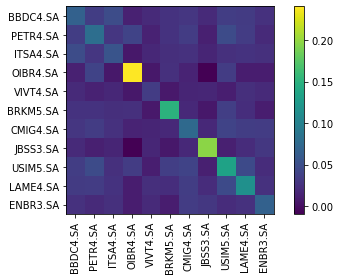

In [32]:
plt.figure(figsize=(10,10))
plotting.plot_covariance(risk_models.risk_matrix(newdata, method='sample_cov'));

Uma coisa importante é que a matriz de covariância deve ser semipositiva definida. O próximo método identifica se a matriz de covariância é ou não semipositiva definida, caso não seja é aplicada uma correção na matriz (que pode ser pelo método *spectral* que zera os autovalores negativos ou *diag* que adiciona um pequeno valor positivo à diagonal).

Não houve alteração na matriz o que indica que ela é semipositiva definida.

In [21]:
risk_models.fix_nonpositive_semidefinite(risk_models.risk_matrix(newdata, method='sample_cov'), fix_method='spectral')

,BBDC4.SA,PETR4.SA,ITSA4.SA,OIBR4.SA,VIVT4.SA,BRKM5.SA,CMIG4.SA,JBSS3.SA,USIM5.SA,LAME4.SA,ENBR3.SA
BBDC4.SA,0.068219,0.035918,0.049062,0.013076,0.020074,0.027045,0.029865,0.019984,0.035893,0.034380,0.026483
PETR4.SA,0.035918,0.081176,0.030510,0.040528,0.014580,0.027156,0.034505,0.012836,0.047369,0.034575,0.020302
ITSA4.SA,0.049062,0.030510,0.055846,0.006644,0.018506,0.024400,0.026586,0.016859,0.025003,0.027516,0.025661
OIBR4.SA,0.013076,0.040528,0.006644,0.240608,0.006999,0.024770,0.015456,-0.009503,0.034875,0.010262,0.010953
VIVT4.SA,0.020074,0.014580,0.018506,0.006999,0.034575,0.007572,0.016105,0.017369,0.011574,0.024065,0.020257
BRKM5.SA,0.027045,0.027156,0.024400,0.024770,0.007572,0.151460,0.019542,0.006427,0.037184,0.023434,0.010398
CMIG4.SA,0.029865,0.034505,0.026586,0.015456,0.016105,0.019542,0.075510,0.018975,0.040473,0.036339,0.035425
JBSS3.SA,0.019984,0.012836,0.016859,-0.009503,0.017369,0.006427,0.018975,0.197522,0.012486,0.022284,0.030879
USIM5.SA,0.035893,0.047369,0.025003,0.034875,0.011574,0.037184,0.040473,0.012486,0.134378,0.046847,0.021944
LAME4.SA,0.034380,0.034575,0.027516,0.010262,0.024065,0.023434,0.036339,0.022284,0.046847,0.116210,0.025824


Também é possível coverter a matriz de covariância em matriz de correlação e vice-versa.

Definindo a matriz.

In [22]:
matriz = risk_models.risk_matrix(newdata, method='sample_cov')

Convertendo a matriz de covariância para matriz de correlação.

In [23]:
risk_models.cov_to_corr(matriz)

,BBDC4.SA,PETR4.SA,ITSA4.SA,OIBR4.SA,VIVT4.SA,BRKM5.SA,CMIG4.SA,JBSS3.SA,USIM5.SA,LAME4.SA,ENBR3.SA
BBDC4.SA,1.000000,0.482660,0.794875,0.102066,0.413329,0.266067,0.416104,0.172155,0.374884,0.386125,0.387790
PETR4.SA,0.482660,1.000000,0.453135,0.289994,0.275206,0.244912,0.440724,0.101371,0.453545,0.355983,0.272528
ITSA4.SA,0.794875,0.453135,1.000000,0.057314,0.421143,0.265306,0.409405,0.160518,0.288628,0.341562,0.415300
OIBR4.SA,0.102066,0.289994,0.057314,1.000000,0.076735,0.129754,0.114666,-0.043590,0.193950,0.061371,0.085402
VIVT4.SA,0.413329,0.275206,0.421143,0.076735,1.000000,0.104640,0.315190,0.210171,0.169799,0.379651,0.416652
BRKM5.SA,0.266067,0.244912,0.265306,0.129754,0.104640,1.000000,0.182737,0.037155,0.260643,0.176633,0.102186
CMIG4.SA,0.416104,0.440724,0.409405,0.114666,0.315190,0.182737,1.000000,0.155375,0.401795,0.387924,0.493038
JBSS3.SA,0.172155,0.101371,0.160518,-0.043590,0.210171,0.037155,0.155375,1.000000,0.076641,0.147081,0.265729
USIM5.SA,0.374884,0.453545,0.288628,0.193950,0.169799,0.260643,0.401795,0.076641,1.000000,0.374885,0.228945
LAME4.SA,0.386125,0.355983,0.341562,0.061371,0.379651,0.176633,0.387924,0.147081,0.374885,1.000000,0.289719


## *Efficient Frontier*

Para que seja gerada a fronteira de otimização, como o nome já deixa claro, é necessário minimizar o risco dada uma certa restrição, ou seja,

Minimizar $ f(x)$ 

Sujeito a $g_i(x) \leq 0$, com $i = 1, \dots,n$

$Ax  =b$

Onde $x \in R^n$ e $f(x), g(x)$ são funções convexas.

A grande vantagem de quando trabalha-se com otimização de portfólios é que estamos resolvendo um problema convexo. O que poderia ser algo trabalhoso pode ser feito rapidamente com as funções deste módulo da biblioteca *PyPortfolioOpt*. 

Poderei então otimizar um portfólio minimizando o risco sujeito a uma restrição de retorno.

In [97]:
retorno = expected_returns.mean_historical_return(newdata, returns_data=False, compounding=True, frequency=252)

Criando a fronteira eficiente.

In [98]:
ef=efficient_frontier.EfficientFrontier(retorno, matriz, weight_bounds=(0,1), gamma=0, solver=None, verbose=False)

### Sobre o nosso portfólio

Possui 11 pesos.

In [99]:
ef.n_assets

11

Ativos do portfólio.

In [100]:
ef.tickers

['BBDC4.SA',
 'PETR4.SA',
 'ITSA4.SA',
 'OIBR4.SA',
 'VIVT4.SA',
 'BRKM5.SA',
 'CMIG4.SA',
 'JBSS3.SA',
 'USIM5.SA',
 'LAME4.SA',
 'ENBR3.SA']

Matriz de covariância.

In [101]:
ef.cov_matrix

array([[ 0.06821918,  0.03591761,  0.04906237,  0.01307642,  0.02007397,
         0.02704537,  0.02986466,  0.01998398,  0.03589331,  0.03437974,
         0.02648323],
       [ 0.03591761,  0.08117572,  0.03050966,  0.04052811,  0.01457993,
         0.02715646,  0.03450497,  0.0128361 ,  0.04736928,  0.0345751 ,
         0.02030231],
       [ 0.04906237,  0.03050966,  0.05584616,  0.0066437 ,  0.0185059 ,
         0.02440018,  0.02658591,  0.01685889,  0.02500338,  0.02751615,
         0.02566139],
       [ 0.01307642,  0.04052811,  0.0066437 ,  0.24060771,  0.00699895,
         0.02476993,  0.01545581, -0.00950269,  0.03487454,  0.01026212,
         0.01095326],
       [ 0.02007397,  0.01457993,  0.0185059 ,  0.00699895,  0.03457546,
         0.00757233,  0.01610492,  0.0173686 ,  0.01157399,  0.02406522,
         0.02025719],
       [ 0.02704537,  0.02715646,  0.02440018,  0.02476993,  0.00757233,
         0.15146014,  0.01954239,  0.00642653,  0.03718425,  0.02343373,
         0.010

Retornos esperados.

In [102]:
ef.expected_returns

array([ 0.1538181 ,  0.30425219,  0.19704201, -0.05512255,  0.31361695,
       -0.3239867 ,  0.01606336,  1.18331669, -0.00926041,  0.35187851,
        0.58133037])

Otimização da volatilidasde mínima.

In [103]:
ef.min_volatility()

OrderedDict([('BBDC4.SA', 0.0),
             ('PETR4.SA', 0.0420326170928969),
             ('ITSA4.SA', 0.12046401373251),
             ('OIBR4.SA', 0.0590517112430514),
             ('VIVT4.SA', 0.4898589395684457),
             ('BRKM5.SA', 0.077431381902921),
             ('CMIG4.SA', 0.0645901046982376),
             ('JBSS3.SA', 0.0490505824112615),
             ('USIM5.SA', 0.0302895050592241),
             ('LAME4.SA', 0.0),
             ('ENBR3.SA', 0.0672311442914517)])

Índice de *Sharpe* de cada ação (usado para analisar o desempenho do ativo em relação ao ativo livre de risco). Em comparação ao ativo livre de risco as ações com melhores desempenhos são *PETR4.SA*, *VIVT4.SA*,*JBSS3.SA* e *ENBR3.SA*.

In [104]:
ef.max_sharpe()

OrderedDict([('BBDC4.SA', 0.0),
             ('PETR4.SA', 0.0750821364931807),
             ('ITSA4.SA', 0.0),
             ('OIBR4.SA', 0.0),
             ('VIVT4.SA', 0.2048146820283269),
             ('BRKM5.SA', 0.0),
             ('CMIG4.SA', 0.0),
             ('JBSS3.SA', 0.3561854558125462),
             ('USIM5.SA', 0.0),
             ('LAME4.SA', 0.0),
             ('ENBR3.SA', 0.3639177256659462)])

Pesos da carteira ou portfólio eficiente.

In [84]:
ef.weights

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.72870366, 0.        , 0.        ,
       0.27129634])

Aqui eu irei otimizar o retorno eficiente dado um risco alvo, que eu vou definir como 0.1, arbritariamente.

Veja que para nosso conjunto de ativos o portfólio que seria o mais eficiente teria 72.8% de ações da *JBSS3.SA* e 27.12% da *ENBR3.SA*.

In [40]:
ef.efficient_return(target_return = 0.1)

OrderedDict([('BBDC4.SA', 0.0),
             ('PETR4.SA', 0.0),
             ('ITSA4.SA', 0.0),
             ('OIBR4.SA', 0.0),
             ('VIVT4.SA', 0.0),
             ('BRKM5.SA', 0.0),
             ('CMIG4.SA', 0.0),
             ('JBSS3.SA', 0.7287036566905656),
             ('USIM5.SA', 0.0),
             ('LAME4.SA', 0.0),
             ('ENBR3.SA', 0.2712963433094346)])

Calculando o Retorno esperado, volatilidade e índice de *Sharpe* do nosso portfólio.

In [85]:
print('Retorno esperado do portfólio :',ef.portfolio_performance()[0])
print('Volatilidade do portfólio :',ef.portfolio_performance()[1])
print('Índice de Sharpe do portfólio :',ef.portfolio_performance()[2])

Retorno esperado do portfólio : 1.0200000000000002
Volatilidade do portfólio : 0.34946707624919787
Índice de Sharpe do portfólio : 2.861499889296926


Plotando a Fronteira Eficiente

Vamos visualizar onde está localizada a carteira ótima dentre todas as possivéis carteiras. Nosso resultado ótimo está em cima da linha azul, ou seja, na fronteira do conjunto de carteiras.

<Figure size 1440x720 with 0 Axes>

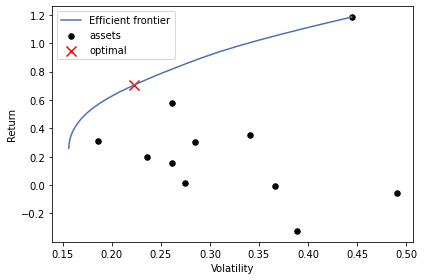

In [91]:
plot=cla.CLA(expected_returns.mean_historical_return(newdata, returns_data=False, compounding=True, frequency=252), matriz, weight_bounds=(0,1))
plt.figure(figsize=(20,10))
plotting.plot_efficient_frontier(plot);

Plotando *clusters* de ativos

Podemos visualizar os ativos que possuem semelhanças por meio de um dendrograma, que é um gráfico em formato de árvore e que organiza variáveis. Podemos notar que as ações *BBDC4.SA* e *ITSA4.SA*, que são justamente ativos do setor bancário (Bradesco e Itaú Unibanco); e outras que são semelhantes são *CMIG4.SA* e *ENBR3.SA*, que são do setor elétrico.

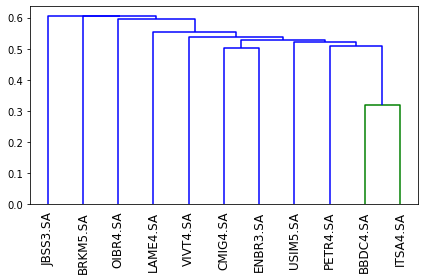

In [83]:
hpt=hierarchical_portfolio.HRPOpt(returns = expected_returns.returns_from_prices(newdata, log_returns=False),cov_matrix=matriz)
plotting.plot_dendrogram(hpt);

## Conclusão

Com essa biblioteca pude aplicar de forma mais automatizada métodos de para identificação de uma carteira de ativos ótima que reduza o risco desse conjunto de ações. Gerei os retornos esperados anualizados, retornos esperados logarítmicos, retornos pelo método *CAPM*, matrizes de covariância (que são os modelos de risco), por fim, a fronteira de eficiência (com a carteira ótima) e agrupamentos de ativos.

Existem outras funcionalidades que poderiam ser aplicadas, mas serão usadas em outro projeto, como por exemplo a inserção de regularizações, de restrições na fronteira de eficiência e a alocação *Black-Litterman* (método bayseano de alocação de ativos).

